In [1]:
import numpy as np
import scipy

import matplotlib.pyplot as plt

from tqdm import tqdm
from reservoir import Reservoir

In [15]:
def create_lorenz_data(time):
    alpha = 10
    beta  = 28
    gamma = 8/3
    
    def lorenz(x, y, z):
        dx = alpha * (y - x)
        dy = x * (beta - z) - y
        dz = x*y - gamma*z
    
        return np.array([dx,dy,dz])
    y0 = np.array([11., 12., 13.])
    #y0 = np.random.rand(3)
    timeseries = np.zeros((3, time*3))
    timeseries[:,0] = np.copy(y0)
    
    for i in range(1,time*3):
        y0 += lorenz(*y0) * 1e-2
        timeseries[:,i] = np.copy(y0)

    return timeseries[:,::3]

def create_lorenz84_data(time):
    R = 6.     #6.886
    G = 1.     #1.347
    a = 0.25   #0.255
    b = 4.0    #4.0
    def lorenz84(x,y,z):
        dx = -y**2 -z**2 -a*x +a*R
        dy = x*y -y -b*x*z + G
        dz = b*x*y + x*z -z
        
        return np.array([dx,dy,dz])
    y0 = np.array([2.5,2.5,2.5])
    #y0 += np.random.rand(3)
    timeseries = np.zeros((3, time))
    timeseries[:,0] = np.copy(y0)
    
    for i in range(1,time):
        y0 += lorenz84(*y0) * 1e-2
        timeseries[:,i] = np.copy(y0)

    return timeseries

with open('com_swarm_ring.npy', 'rb') as f:
    a = np.load(f)
with open('vel_swarm_ring.npy', 'rb') as f:
    b = np.load(f)

timeseries = np.hstack((a,b)).T

times = [2000, 1000, 1000]
#timeseries = create_lorenz_data(sum(times)+1)
#timeseries = create_lorenz84_data(sum(times)+1)

#reservoir = Reservoir(groundtruth=timeseries, data=np.array([timeseries[2,:]]))
r = Reservoir(groundtruth=timeseries[:,1:], data=timeseries[:,:], times=times)
r.n_nodes, r.sparsity = 500, 0.005

#r.alpha, r.beta, r.target_spectral_radius, r.input_scaling, r.bias_scaling, r.hist, r.prob, r.axis_label = 0.63, 0.0001, 0.63, 167.0, 119.0, 25, 0.05, ["x", "y", "z"] # lorenz
#r.alpha, r.beta, r.target_spectral_radius, r.input_scaling, r.bias_scaling, r.hist, r.prob, r.axis_label = 0.1, 1e-05, 0.7, 93.7, 5.5, 25, 0.13, ["x", "y", "z"] # lorenz84
r.alpha, r.beta, r.target_spectral_radius, r.input_scaling, r.bias_scaling, r.hist, r.prob, r.axis_label = 0.475, 1e-05, 0.2, 0.1, 1.1, 25, 0.3, ["$CoM_x$", "$CoM_y$", "$v_x$", "$v_y$"] # swarm 1
#r.optimize_parameters()

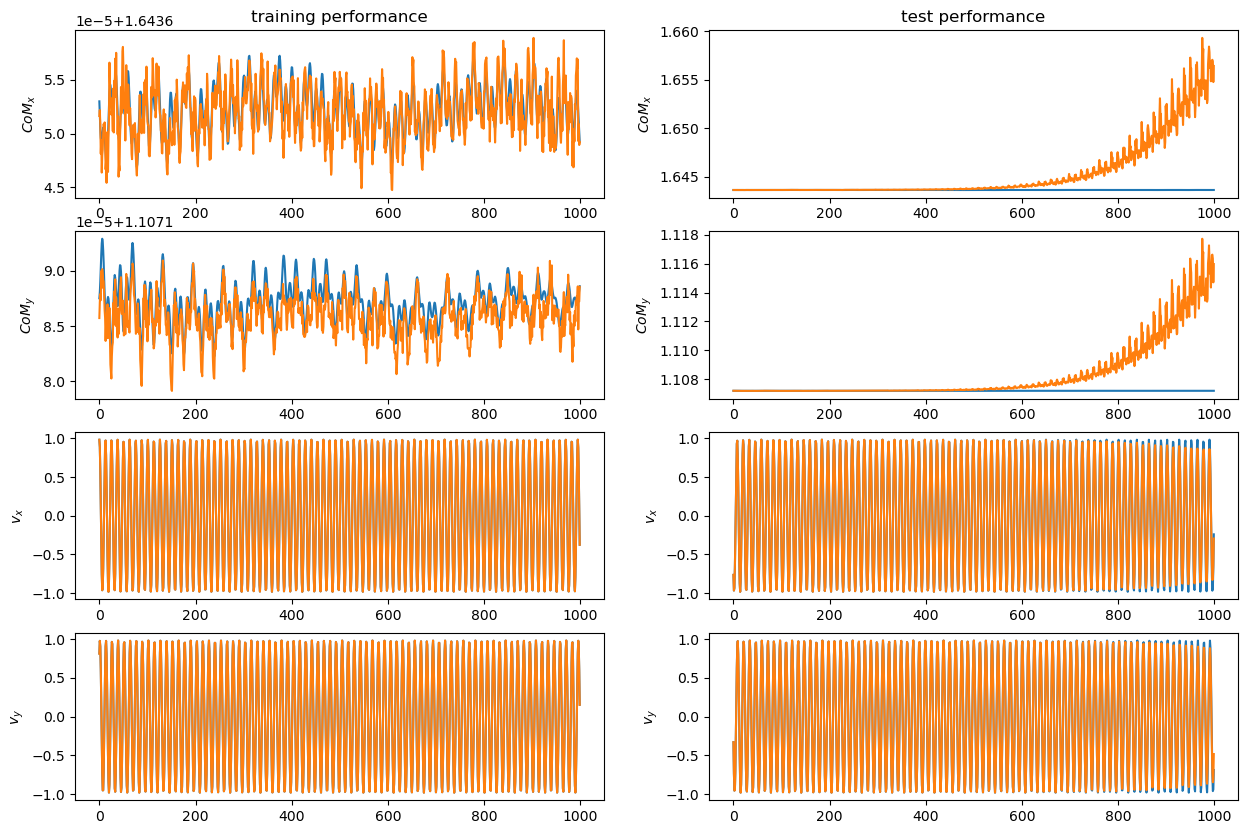

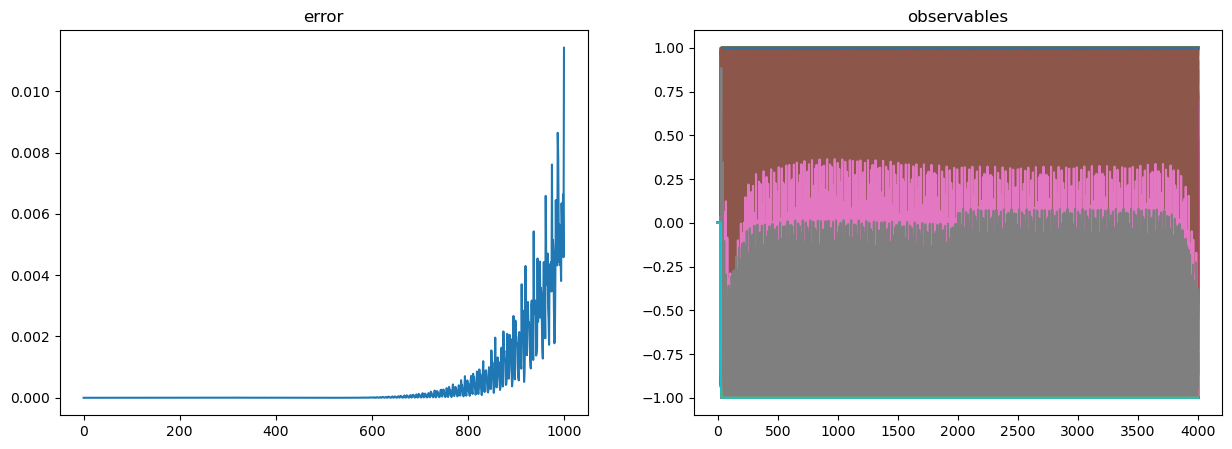

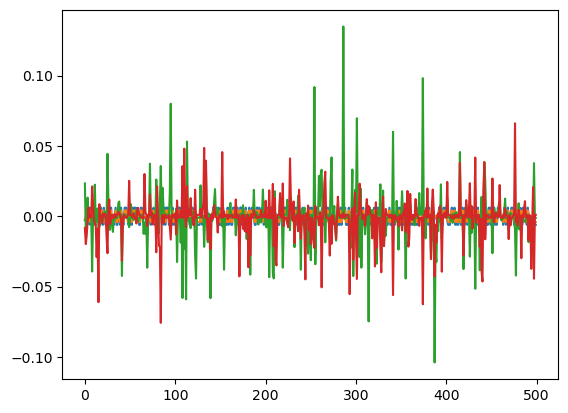

0.4270263890511585


In [16]:
r.reset()
r.warmup()
r.train()
r.test()
r.plot_results()
plt.plot(r.weights_out.T)
plt.show()
print(np.sum(r.error[:r.train_time]))

In [ ]:
print(r.alpha, r.beta, r.target_spectral_radius, r.input_scaling, r.bias_scaling, r.prob)